# Getting started with momepy

The goal of this notebook is to get comfortable with momepy.

#### Project objective:
Explore momepy.

#### Output
Install momepy, explore three places with it. Write down the follow-ups I intend to do.  

*Nice to have:*  
An actual map output of Kraków for the blog.  
Email the contributor.  
Post an improvement request.  

#### Post-project:

## Code

In [1]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
buildings = gpd.read_file(momepy.datasets.get_path('bubenec'),
                          layer='buildings')

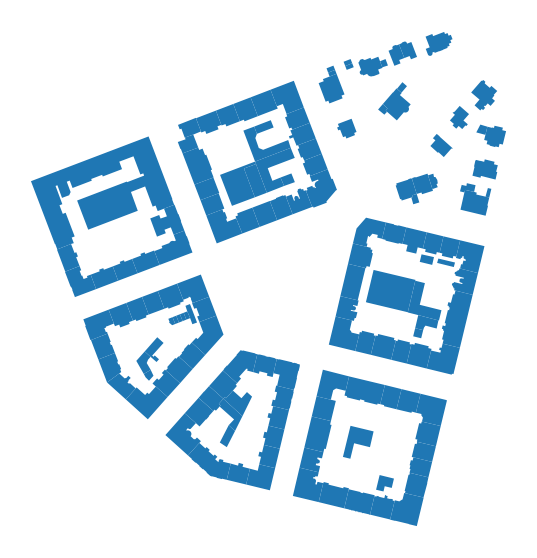

In [3]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax)
ax.set_axis_off()
plt.show()

## Next time:

Keep stepping through this tute
http://docs.momepy.org/en/stable/user_guide/getting_started.html

In [4]:
import osmnx as ox
import ogr

In [5]:
gdf = ox.footprints.footprints_from_place("Pękowice, Zielonki, Poland", footprint_type='building')

/Users/Filip/code/python/miniconda3/envs/momepy/lib/python3.7/site-packages/osmnx/footprints.py:129: UserWarning: The `footprints` module has been deprecated and will be removed in a future release. Instead, use the `geometries` module's `geometries_from_place` function, passing `tags={'building':True}`.
  warnings.warn(msg)


/Users/Filip/code/python/miniconda3/envs/momepy/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

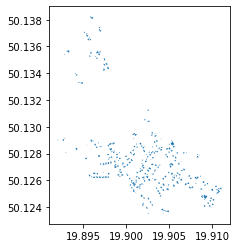

In [6]:
gdf.plot()

In [7]:
gdf_projected = ox.projection.project_gdf(gdf)

buildings = momepy.preprocess(gdf_projected, size=30,
                              compactness=True, islands=True)

/Users/Filip/code/python/miniconda3/envs/momepy/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Loop 1 out of 2.


Changing geometry: 100%|██████████| 42/42 [00:00<00:00, 68.05it/s]


Loop 2 out of 2.


Changing geometry: 100%|██████████| 2/2 [00:00<00:00, 38.46it/s]


In [8]:
buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)

/Users/Filip/code/python/miniconda3/envs/momepy/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
tessellation = momepy.Tessellation(buildings, unique_id='uID', limit=limit).tessellation

Inward offset...
Generating input point array...
Generating Voronoi diagram...
Generating GeoDataFrame...
Dissolving Voronoi polygons...


/Users/Filip/code/python/miniconda3/envs/momepy/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

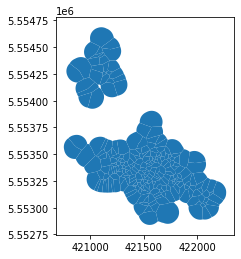

In [10]:
tessellation.plot()